In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_excel('Dataset.xlsx', index_col=None)

In [ ]:
df = df.rename(columns={"Id": "id", "Data": "data", "Volume Solicitado Antecipação": "solicitado_ant", "Cluster": "cluster", "Segmento de atuação": "segmento", "Região": "regiao", "Taxa de antecipação": "taxa_ant", "Alíquota de custo": "aliquota", "Volume líquido Antecipação": "liquido_ant", "Receita": "receita", "Custo": "custo", "Lucro da operação": "lucro"})

In [ ]:
df.head(61920)

,Id,Data,Volume Solicitado Antecipação,Cluster,Segmento de atuação,Região,Taxa de antecipação,Alíquota de custo,Volume líquido Antecipação,Receita,Custo,Lucro da operação,Unnamed: 12
0,745457,2018-07-30,0.009698,1,Alimentação e Bebidas,Região A,0.0419,0.05,0.009292,0.000406,0.000020,0.000386,NaN
1,385700,2018-10-09,0.009718,1,Entretenimento e Turismo,Região A,0.0409,0.05,0.009321,0.000397,0.000020,0.000378,NaN
2,7719,2017-07-25,0.009848,1,Alimentação e Bebidas,Região B,0.0384,0.10,0.009470,0.000378,0.000038,0.000340,NaN
3,800741,2018-10-11,0.039280,4,Comércio de Veículos,Região A,0.0224,0.05,0.038400,0.000880,0.000044,0.000836,NaN
4,304165,2018-01-23,0.048805,4,Comércio de Veículos,Região C,0.0209,0.15,0.047785,0.001020,0.000153,0.000867,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61915,238364,2017-09-11,19203.466940,4,Alimentação e Bebidas,Região A,0.0206,0.05,18807.875521,395.591419,19.779571,375.811848,NaN
61916,360874,2018-12-10,19046.129322,5,Comércio de Veículos,Região A,0.0120,0.05,18817.575770,228.553552,11.427678,217.125874,NaN
61917,9113,2018-08-20,19217.952962,4,Comércio de Veículos,Região A,0.0208,0.05,18818.219540,399.733422,19.986671,379.746751,NaN
61918,360874,2018-09-10,19070.882483,5,Comércio de Veículos,Região A,0.0120,0.05,18842.031893,228.850590,11.442529,217.408060,NaN


In [ ]:
## final colocar qts % vai aumentar rentabilidade, fazer slides canvas, mostrar python e excel

In [ ]:
df1 = df.id.value_counts().reset_index().rename(
           columns={'index': 'id', 0: 'count'})
df1.head(5)

#df['cont_id'] = df.apply(df.id.value_counts(), axis=1)

,id,id
0,238364,374
1,2620,374
2,3079,374
3,2923,374
4,8582,374


In [ ]:
#df = df.drop(columns=["Unnamed: 12"])

In [ ]:
df.isnull().any()

id                False
data              False
solicitado_ant    False
cluster           False
segmento          False
regiao            False
taxa_ant          False
aliquota          False
liquido_ant       False
receita           False
custo             False
lucro             False
dtype: bool

In [ ]:
df.dtypes

id                         int64
data              datetime64[ns]
solicitado_ant           float64
cluster                    int64
segmento                  object
regiao                    object
taxa_ant                 float64
aliquota                 float64
liquido_ant              float64
receita                  float64
custo                    float64
lucro                    float64
dtype: object

In [ ]:
df.shape

(63947, 12)

In [ ]:
df.describe()

,id,solicitado_ant,cluster,taxa_ant,aliquota,liquido_ant,receita,custo,lucro
count,63947.000000,6.394700e+04,63947.000000,63947.000000,63947.000000,6.394700e+04,63947.000000,63947.000000,63947.000000
mean,339318.957887,8.410632e+03,2.809608,0.029307,0.096412,8.274270e+03,136.362733,14.780780,121.581952
std,229766.988700,9.991083e+04,1.422290,0.009523,0.040115,9.865069e+04,1262.888438,179.695403,1088.519051
min,683.000000,9.698000e-03,1.000000,0.010100,0.050000,9.291654e-03,0.000378,0.000020,0.000340
25%,234169.000000,3.202262e+02,1.000000,0.022100,0.050000,3.093011e+02,10.416193,0.865652,9.396966
50%,301063.000000,1.123858e+03,3.000000,0.027900,0.100000,1.092036e+03,30.918725,2.685701,27.902507
75%,412317.000000,3.359109e+03,4.000000,0.036400,0.150000,3.275745e+03,82.745907,7.473572,74.610483
max,871559.000000,6.135325e+06,5.000000,0.050000,0.150000,6.065996e+06,75625.159808,11343.773971,65862.714355


In [ ]:
dfc = pd.read_excel('Clientes.xlsx', index_col=None)

In [ ]:
dfc = dfc.rename(columns={"Id": "id", "Número de Solicitações": "num_solicitacoes", "Volume Solicitado Antecipação": "solicitado_ant", "Volume Solicitado Médio": "solicitado_medio", "Cluster": "cluster", "Segmento de atuação": "segmento", "Região": "regiao", "Taxa de antecipação": "taxa_ant", "Alíquota de custo": "aliquota", "Volume líquido Antecipação": "liquido_ant", "Receita": "receita", "Custo": "custo", "Lucro da operação": "lucro"})

In [ ]:
dfc.head()

,id,num_solicitacoes,solicitado_ant,solicitado_medio,cluster,segmento,regiao,taxa_ant,aliquota,liquido_ant,receita,custo,lucro
0,745457,4,1719.493698,429.873425,1,Alimentação e Bebidas,Região A,0.0419,0.05,1647.446912,72.046786,3.602339,68.444447
1,385700,87,43221.056518,496.793753,1,Entretenimento e Turismo,Região A,0.0409,0.05,41453.315306,1767.741212,88.387061,1679.354151
2,7719,75,25905.545298,345.407271,1,Alimentação e Bebidas,Região B,0.0384,0.10,24910.772359,994.772939,99.477294,895.295645
3,800741,17,288028.252558,16942.838386,4,Comércio de Veículos,Região A,0.0224,0.05,281576.419701,6451.832857,322.591643,6129.241214
4,304165,259,538231.692758,2078.114644,4,Comércio de Veículos,Região C,0.0209,0.15,526982.650379,11249.042379,1687.356357,9561.686022


In [ ]:
# Instalação de um módulo a ser utilizado
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
#report = sv.analyze(df)
report = sv.analyze(dfc)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 357 kB/s 


In [ ]:
from category_encoders.one_hot import OneHotEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
enc = OneHotEncoder(cols=['cluster','segmento','regiao'], use_cat_names=True)
df_corr = enc.fit_transform(df)

,id,solicitado_ant,cluster_1.0,cluster_4.0,cluster_3.0,cluster_2.0,cluster_5.0,segmento_Alimentação e Bebidas,segmento_Entretenimento e Turismo,segmento_Comércio de Veículos,regiao_Região A,regiao_Região B,regiao_Região C,taxa_ant,aliquota,liquido_ant,receita,custo,lucro
id,1.000000,-0.011679,0.210670,-0.129119,0.028825,-0.020991,-0.123513,0.035376,-0.065020,0.026097,0.107147,-0.107315,-0.000473,0.244152,-0.064383,-0.011678,-0.011732,-0.007271,-0.012411
solicitado_ant,-0.011679,1.000000,-0.049761,-0.027244,-0.023608,-0.027265,0.176084,-0.005664,0.046448,-0.038745,-0.003838,-0.040050,0.046261,-0.115751,0.028422,1.000000,0.997852,0.964610,0.998457
cluster_1.0,0.210670,-0.049761,1.000000,-0.462887,-0.243794,-0.262103,-0.215571,-0.051373,-0.014753,0.066820,0.017895,0.007929,-0.027314,0.838373,-0.026133,-0.049698,-0.054592,-0.042526,-0.056316
cluster_4.0,-0.129119,-0.027244,-0.462887,1.000000,-0.270490,-0.290804,-0.239177,-0.056398,0.094797,-0.033107,0.011987,-0.026334,0.015042,-0.516077,0.001322,-0.027350,-0.018866,-0.019060,-0.018742
cluster_3.0,0.028825,-0.023608,-0.243794,-0.270490,1.000000,-0.153161,-0.125970,0.107877,-0.026893,-0.084803,0.067535,-0.085002,0.017992,0.017570,-0.030252,-0.023632,-0.021714,-0.018394,-0.022156
cluster_2.0,-0.020991,-0.027265,-0.262103,-0.290804,-0.153161,1.000000,-0.135430,-0.044305,-0.093739,0.135337,-0.128217,0.115759,0.013903,0.021976,0.084575,-0.027263,-0.027403,-0.021507,-0.028242
cluster_5.0,-0.123513,0.176084,-0.215571,-0.239177,-0.125970,-0.135430,1.000000,0.099614,0.011273,-0.112940,0.028402,-0.011305,-0.018186,-0.503543,-0.027266,0.176179,0.168283,0.139784,0.172165
segmento_Alimentação e Bebidas,0.035376,-0.005664,-0.051373,-0.056398,0.107877,-0.044305,0.099614,1.000000,-0.493771,-0.551613,0.091019,-0.038869,-0.055494,-0.026565,-0.085804,-0.005627,-0.008552,-0.024557,-0.005868
segmento_Entretenimento e Turismo,-0.065020,0.046448,-0.014753,0.094797,-0.026893,-0.093739,0.011273,-0.493771,1.000000,-0.452956,-0.005664,0.004172,0.001607,-0.050392,0.004297,0.046418,0.048675,0.058294,0.046849
segmento_Comércio de Veículos,0.026097,-0.038745,0.066820,-0.033107,-0.084803,0.135337,-0.112940,-0.551613,-0.452956,1.000000,-0.087883,0.035848,0.055353,0.075571,0.083848,-0.038755,-0.037920,-0.030738,-0.038921


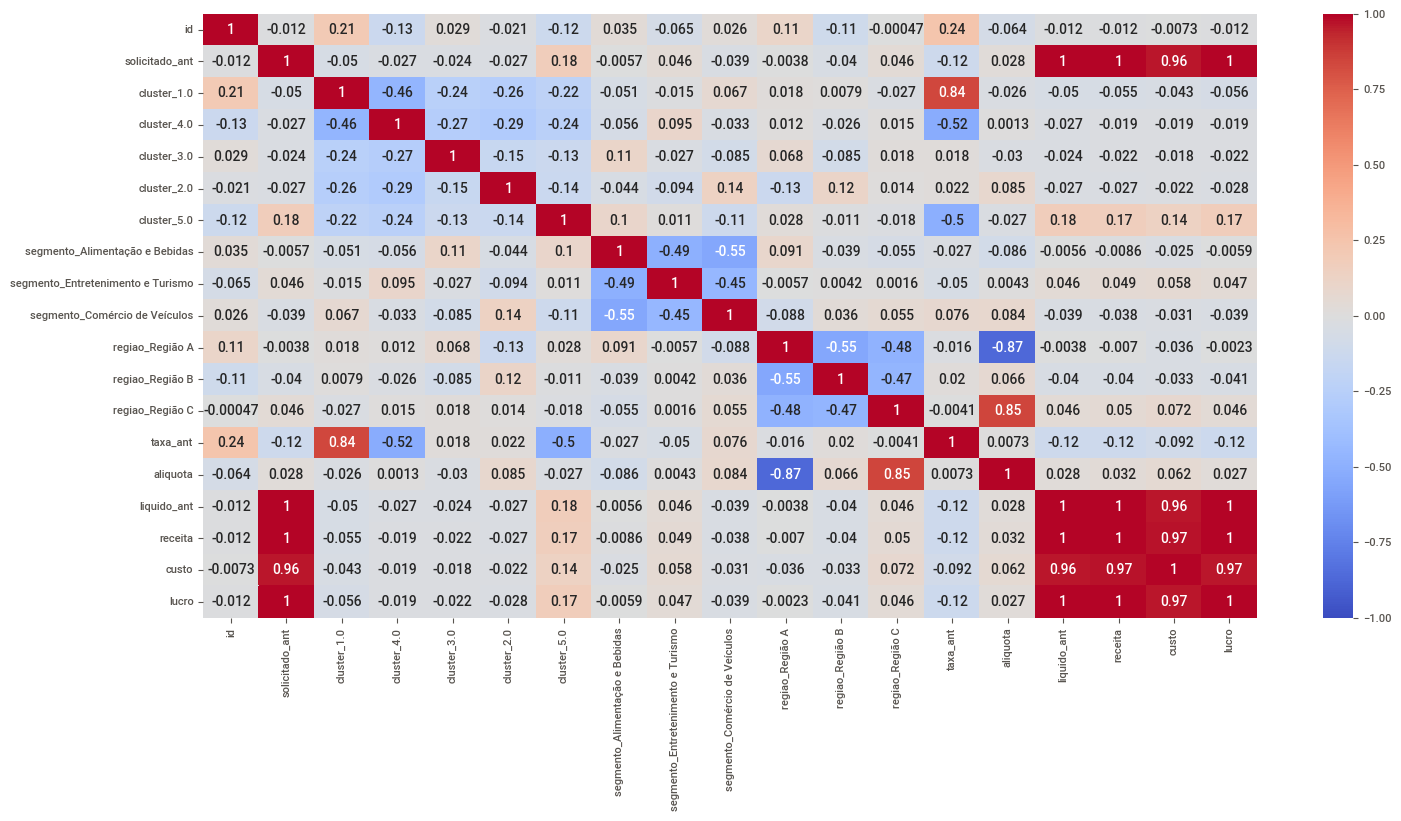

In [ ]:
plt.figure(figsize=(17,8))

correlacao = df_corr.corr()
correlacao = (correlacao)
sns.heatmap(correlacao,xticklabels=correlacao.columns.values,yticklabels=correlacao.columns.values,annot=True,vmin=-1,vmax=1,cmap='coolwarm',linewidths=0)

correlacao

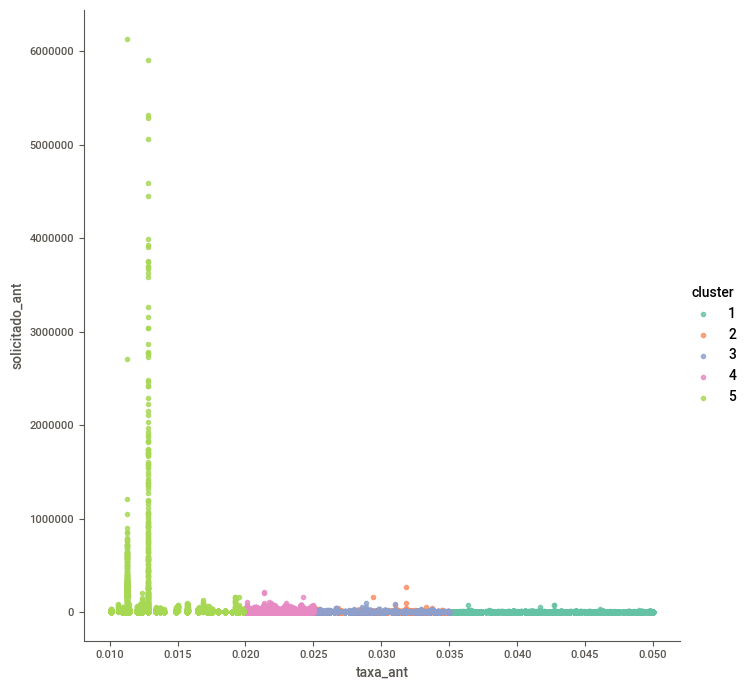

In [ ]:
sns.lmplot(x='taxa_ant',y='solicitado_ant',data=df,fit_reg=False,hue='cluster',palette='Set2',height=7)

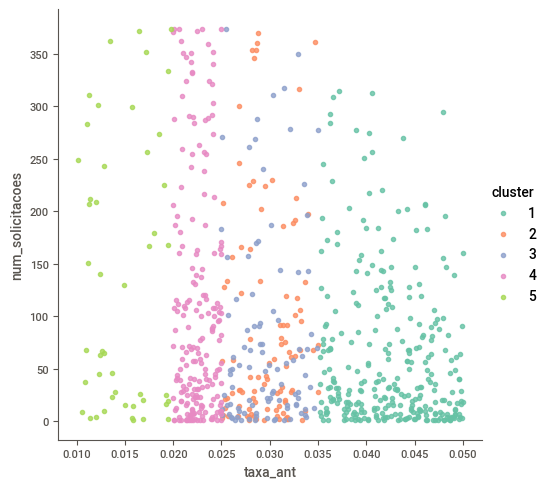

In [ ]:
sns.lmplot(x='taxa_ant',y='num_solicitacoes',data=dfc,fit_reg=False,hue='cluster',palette='Set2',height=5)

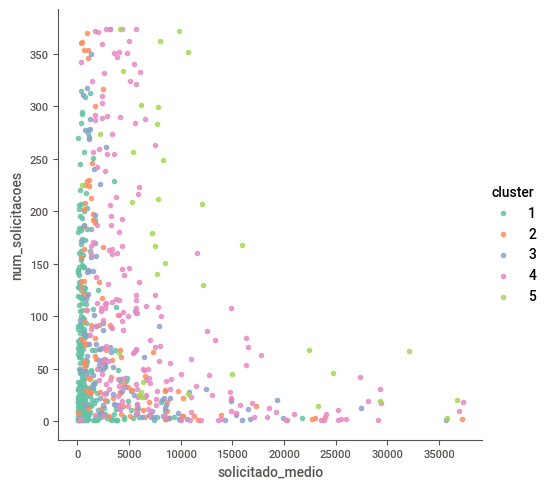

In [ ]:
dfc2= dfc[np.abs(dfc.solicitado_medio-dfc.solicitado_medio.mean()) <= (0.7*dfc.solicitado_medio.std())]
dfc2 = dfc[~(np.abs(dfc.solicitado_medio-dfc.solicitado_medio.mean()) > (0.7*dfc.solicitado_medio.std()))]

sns.lmplot(x='solicitado_medio',y='num_solicitacoes',data=dfc2,fit_reg=False,hue='cluster',palette='Set2',height=5)

In [ ]:
dfc2= dfc[np.abs(dfc.solicitado_medio-dfc.solicitado_medio.mean()) <= (3*dfc.solicitado_medio.std())]
dfc2 = dfc[~(np.abs(dfc.solicitado_medio-dfc.solicitado_medio.mean()) > (3*dfc.solicitado_medio.std()))]

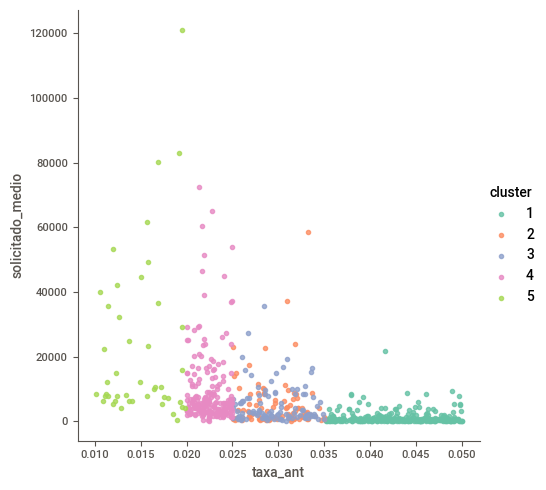

In [ ]:
sns.lmplot(x='taxa_ant',y='solicitado_medio',data=dfc2,fit_reg=False,hue='cluster',palette='Set2',height=5)

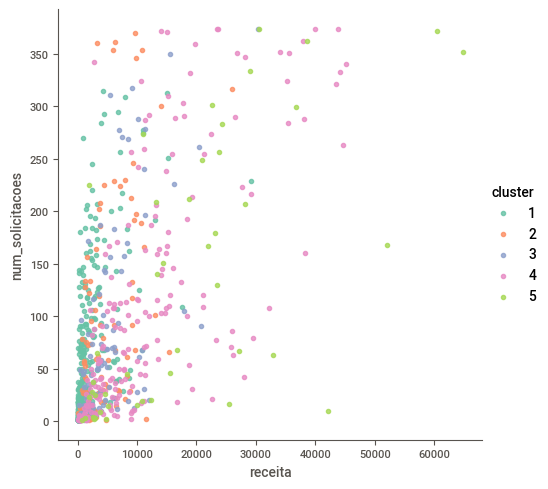

In [ ]:
dfc2= dfc[np.abs(dfc.receita-dfc.receita.mean()) <= (3*dfc.receita.std())]
dfc2 = dfc[~(np.abs(dfc.receita-dfc.receita.mean()) > (3*dfc.receita.std()))]

sns.lmplot(x='receita',y='num_solicitacoes',data=dfc2,fit_reg=False,hue='cluster',palette='Set2',height=5)

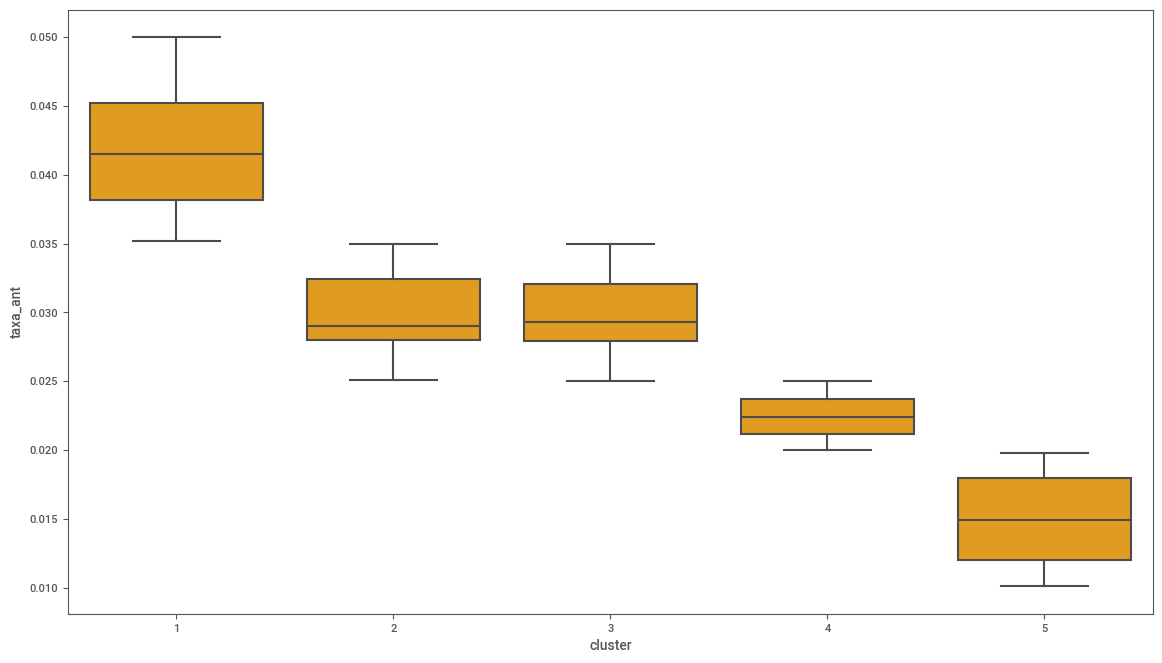

In [ ]:
fig = plt.figure(figsize=(14,8))

sns.boxplot(x='cluster',y='taxa_ant',data=df,color='orange')

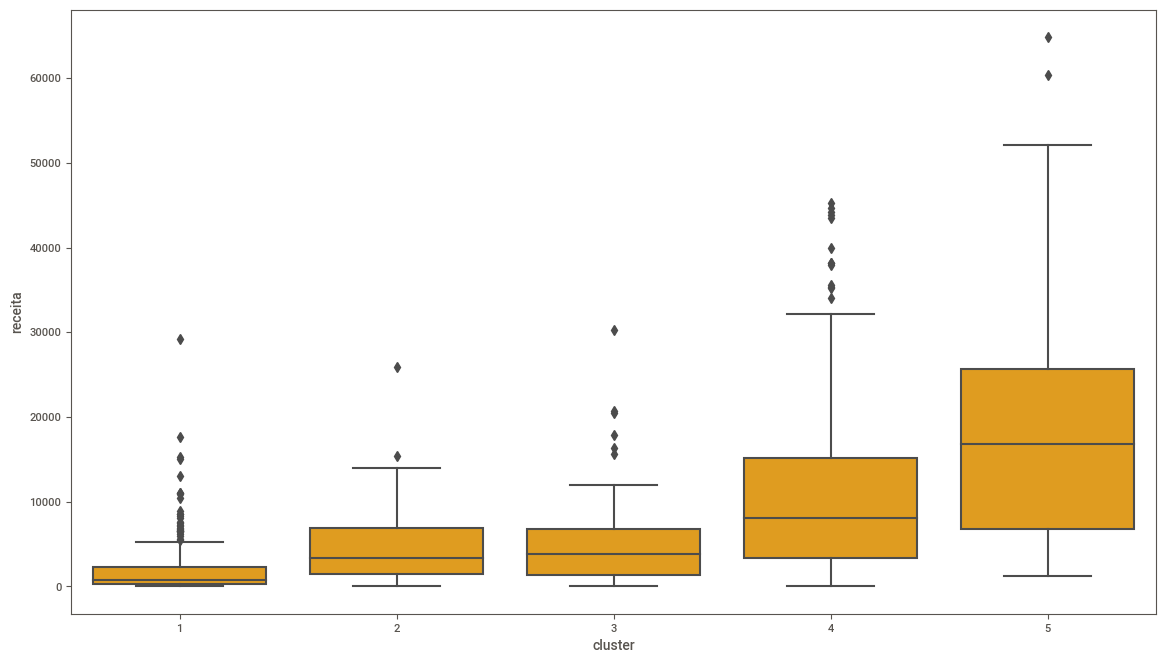

In [ ]:
fig = plt.figure(figsize=(14,8))

sns.boxplot(x='cluster',y='receita',data=dfc2,color='orange')

In [ ]:
clientes = df

In [ ]:
clientes.head()

,id,data,solicitado_ant,cluster,segmento,regiao,taxa_ant,aliquota,liquido_ant,receita,custo,lucro
0,745457,2018-07-30,0.009698,1,Alimentação e Bebidas,Região A,0.0419,0.05,0.009292,0.000406,0.000020,0.000386
1,385700,2018-10-09,0.009718,1,Entretenimento e Turismo,Região A,0.0409,0.05,0.009321,0.000397,0.000020,0.000378
2,7719,2017-07-25,0.009848,1,Alimentação e Bebidas,Região B,0.0384,0.10,0.009470,0.000378,0.000038,0.000340
3,800741,2018-10-11,0.039280,4,Comércio de Veículos,Região A,0.0224,0.05,0.038400,0.000880,0.000044,0.000836
4,304165,2018-01-23,0.048805,4,Comércio de Veículos,Região C,0.0209,0.15,0.047785,0.001020,0.000153,0.000867


In [ ]:
df3 = clientes.id.value_counts().reset_index().rename(
           columns={'index': 'id', 0: 'count'})

In [ ]:
df3.head(7)

,id,id
0,238364,374
1,2620,374
2,3079,374
3,2923,374
4,8582,374
5,8815,374
6,10361,372


In [ ]:
#df_corr = df_corr.drop(columns=['data'])
df_corr.head()

,id,solicitado_ant,cluster_1.0,cluster_4.0,cluster_3.0,cluster_2.0,cluster_5.0,segmento_Alimentação e Bebidas,segmento_Entretenimento e Turismo,segmento_Comércio de Veículos,regiao_Região A,regiao_Região B,regiao_Região C,taxa_ant,aliquota,liquido_ant,receita,custo,lucro
0,745457,0.009698,1,0,0,0,0,1,0,0,1,0,0,0.0419,0.05,0.009292,0.000406,0.000020,0.000386
1,385700,0.009718,1,0,0,0,0,0,1,0,1,0,0,0.0409,0.05,0.009321,0.000397,0.000020,0.000378
2,7719,0.009848,1,0,0,0,0,1,0,0,0,1,0,0.0384,0.10,0.009470,0.000378,0.000038,0.000340
3,800741,0.039280,0,1,0,0,0,0,0,1,1,0,0,0.0224,0.05,0.038400,0.000880,0.000044,0.000836
4,304165,0.048805,0,1,0,0,0,0,0,1,0,0,1,0.0209,0.15,0.047785,0.001020,0.000153,0.000867


In [ ]:
enc = OneHotEncoder(cols=['cluster','segmento','regiao'], use_cat_names=True)
df_c = enc.fit_transform(dfc)

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(df_c)

In [ ]:
labels = kmeans.labels_

In [ ]:
labels

array([0, 5, 5, 0, 4, 5, 5, 0, 4, 0, 5, 5, 0, 5, 0, 5, 4, 5, 4, 5, 5, 4,
       4, 5, 5, 0, 0, 5, 0, 5, 4, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0,
       5, 0, 0, 0, 6, 0, 5, 5, 5, 0, 0, 4, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5,
       0, 7, 0, 4, 0, 5, 4, 5, 5, 5, 4, 7, 5, 0, 5, 5, 0, 0, 0, 5, 0, 0,
       5, 0, 0, 5, 5, 0, 0, 4, 5, 5, 0, 4, 5, 5, 5, 4, 0, 4, 0, 5, 0, 5,
       5, 4, 4, 0, 5, 5, 0, 0, 0, 0, 4, 5, 4, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 0, 5, 0, 4, 5, 0, 3, 4, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 5, 0,
       0, 0, 5, 5, 5, 4, 0, 5, 5, 5, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5, 4, 5,
       5, 4, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 5, 0, 5, 0, 5, 0, 0, 5, 0,
       5, 5, 0, 0, 3, 5, 5, 0, 5, 0, 4, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0,
       0, 0, 5, 0, 0, 5, 7, 5, 7, 0, 0, 5, 3, 0, 5, 4, 5, 0, 0, 5, 7, 5,
       0, 0, 0, 0, 0, 4, 0, 5, 5, 5, 7, 3, 4, 3, 5, 7, 4, 4, 4, 0, 0, 5,
       0, 0, 0, 4, 5, 0, 5, 4, 0, 0, 0, 0, 5, 5, 5, 0, 4, 0, 5, 0, 0, 5,
       0, 5, 0, 5, 0, 0, 0, 4, 0, 5, 0, 4, 4, 0, 0,

In [ ]:
#kmeans.predict([[0, 0], [4, 4]])

In [ ]:
#df_corr['new_cluster'] = df_corr.apply(labels, axis=1)

In [ ]:
kmeans.cluster_centers_

array([[ 7.77724246e+05,  2.53474818e+03,  3.62759830e-01,
         3.28199349e-01,  1.21462559e-01,  1.67292762e-01,
         2.02854996e-02,  4.21612822e-01,  2.08489857e-01,
         3.69897320e-01,  3.69020786e-01,  3.36589031e-01,
         2.94390183e-01,  3.20608941e-02,  9.62684698e-02,
         2.47151397e+03,  6.32342075e+01,  5.83101939e+00,
         5.74031882e+01],
       [ 2.62723886e+05,  4.30839185e+03,  2.68592654e-01,
         3.72513413e-01,  1.26702435e-01,  1.46471317e-01,
         8.57201816e-02,  3.68056129e-01,  3.16302105e-01,
         3.15641766e-01,  3.35451919e-01,  4.01361948e-01,
         2.63186133e-01,  2.86321874e-02,  9.63867107e-02,
         4.22326403e+03,  8.51278188e+01,  7.94283567e+00,
         7.71849831e+01],
       [ 3.23079714e+05,  4.13569839e+06, -1.11022302e-16,
         5.55111512e-17,  4.16333634e-17,  8.32667268e-17,
         1.00000000e+00,  4.76190476e-02,  9.52380952e-01,
         1.66533454e-16,  4.76190476e-02,  1.66533454e-16,
    

In [ ]:
alvo = df_c['receita']
pred = df_c.drop('receita', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

pred_treino, pred_teste, alvo_treino, alvo_teste = train_test_split(pred, alvo, test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
mdl = RandomForestRegressor(n_estimators=100)
mdl.fit(pred_treino, alvo_treino)

RandomForestRegressor()

In [ ]:
mdl.feature_importances_

array([1.72969599e-03, 8.62166148e-03, 1.61738511e-01, 2.66097719e-01,
       1.16611705e-07, 2.09922311e-06, 8.74096267e-07, 5.11065099e-07,
       2.28384561e-06, 3.44172352e-03, 9.04244828e-06, 3.24259501e-06,
       6.89864333e-03, 1.23353342e-06, 1.76457884e-03, 1.66642671e-03,
       1.72857721e-03, 9.98994776e-02, 2.02917858e-01, 2.43475724e-01])

In [ ]:
#previsao_amostras = mdl.predict([[0.63,4,135,2,1,0,0,1,0,0,0,0,0,0,0,0,0,3]])
#previsao_amostras

263.5054703280728

In [ ]:
# metodo ARIMA
# autoregressao, medias moveis, modelo linear. bom para series nao estacionarias (sasonais)
# AR quantos lags (dados anteriores) ira utilizar
# I integrado nivel de diferenciacao (vendas mes atual - vendas mes do ano anterior)
# Media Movel erro residual da previsao, quantas janelas/lags que ele devera utilizar no modelo
# ARIMA(p,d,q) =


In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [ ]:
#dfr = pd.read_csv('Receita.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
dfr = pd.read_excel('Receita.xlsx')

In [ ]:
# Convert Month into Datetime
dfr['mes']=pd.to_datetime(dfr['mes'])

In [ ]:
dfr.set_index('mes',inplace=True)

In [ ]:
dfr.head()

,receita
mes,
2017-07-01,64693.742261
2017-08-01,73760.421606
2017-09-01,95447.807199
2017-10-01,204986.939162
2017-11-01,272512.903143


In [ ]:
dfr.dtypes

receita    float64
dtype: object

In [ ]:
dfr.describe()

,receita
count,1.800000e+01
mean,4.844438e+05
std,2.729183e+05
min,6.469374e+04
25%,2.939871e+05
50%,5.389088e+05
75%,6.374642e+05
max,1.001030e+06


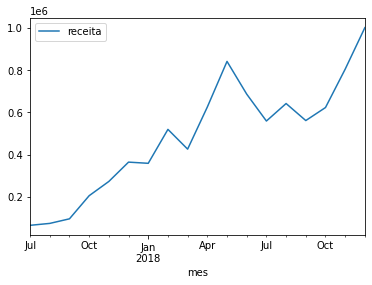

In [ ]:
dfr.plot()

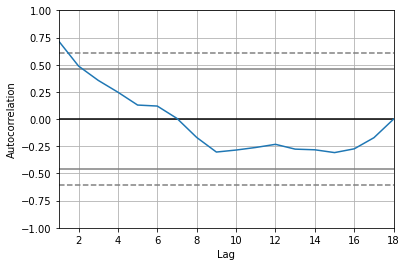

In [ ]:
autocorrelation_plot(dfr)
pyplot.show()
# autocorrelacao ao longo dos meses, os dados mais recentes tendem a ter mais correcao do que os antigos
# Segundo a definição da estatística, o valor da autocorrelação está entre 1 (correlação perfeita) e -1,
# o que significa anti-correlação perfeita. O valor 0 significa total ausência de correlação.

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

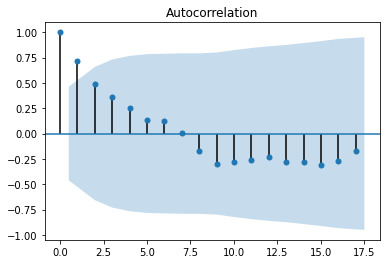

In [ ]:
plot_acf(dfr, lags=17)
pyplot.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
# ARIMA(p,d,q) - 7 qtd de lags gráfico alta correlaçao, nivel de diferenciacao 1 valores nao estacionarios entao 1, 1 q nivel de media movel
model = ARIMA(dfr, order=(14,1,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.receita   No. Observations:                   17
Model:                ARIMA(14, 1, 1)   Log Likelihood                -207.582
Method:                       css-mle   S.D. of innovations           5589.694
Date:                Sun, 26 Dec 2021   AIC                            449.164
Time:                        17:00:03   BIC                            463.329
Sample:                    08-01-2017   HQIC                           450.572
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.508e+04        nan        nan        nan         nan         nan
ar.L1.D.receita     -1.0102      0.003   -290.729      0.002      -1.017      -1.003
ar.L2.D.receita     -0.1193 

In [ ]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

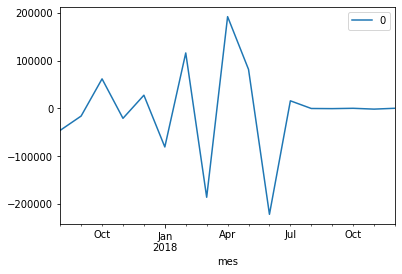

In [ ]:
residuals.plot()
pyplot.show()

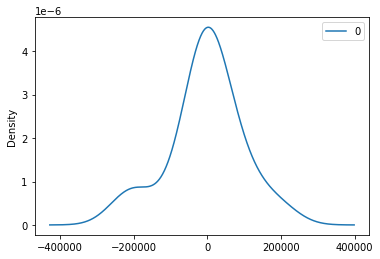

In [ ]:
# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# estatística descritiva dos residuos
print(residuals.describe())
# valor medio do residuo 4600 (erro medio), enviesado negativamente

                   0
count      17.000000
mean    -4679.223874
std     98220.523762
min   -221649.526492
25%    -20875.427995
50%      -305.178680
75%     27491.527074
max    191818.199142


In [ ]:
# Prevendo dados com ARIMA utilizando Walk Forward

# a variável X recebe os dados da série
X = dfr.values
X = X.astype('float32')

In [ ]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)

In [ ]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [ ]:
# cria a variável history
history = [x for x in train]

In [ ]:
# cria lista de previsões
predictions = list()

In [ ]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
test

array([[ 625001.5 ],
       [ 841057.9 ],
       [ 686150.44],
       [ 558698.  ],
       [ 641618.4 ],
       [ 560925.8 ],
       [ 622618.75],
       [ 804382.6 ],
       [1001030.25]], dtype=float32)

In [ ]:
# inicia Walk-Forward
for t in range(len(test)):

  # difference data
  # meses_no_ano = 12
  diff = difference(history, 1)

  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(0,1,1))

  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)

  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, 1)

  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)

  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]

  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=490462.675, Valor esperado=625002
Valor predito=670158.933, Valor esperado=841058
Valor predito=923093.070, Valor esperado=686150
Valor predito=763674.701, Valor esperado=558698
Valor predito=615193.713, Valor esperado=641618
Valor predito=682805.721, Valor esperado=560926
Valor predito=605304.620, Valor esperado=622619
Valor predito=658063.922, Valor esperado=804383
Valor predito=841624.454, Valor esperado=1001030


In [ ]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# errando 150k

Test RMSE: 152073.275


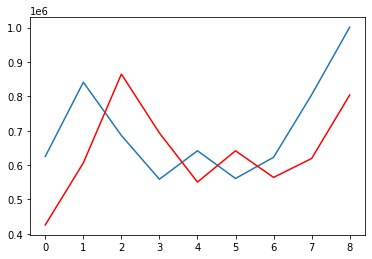

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [ ]:
df = pd.read_excel('base-receita.xlsx')

In [ ]:
dfb = pd.read_excel('base.xlsx')

In [ ]:
df.tail(5)

,Id,Data,Volume Solicitado Antecipação,Cluster,Segmento de atuação,Região,Taxa de antecipação,Alíquota de custo,Volume líquido Antecipação,Receita,Custo,Lucro da operação,Unnamed: 12
63942,326089,2018-12-14,5.058326e+06,5,Entretenimento e Turismo,Região C,0.0128,0.15,4.993579e+06,64746.571776,9711.985766,55034.586010,NaN
63943,326089,2017-12-22,5.285567e+06,5,Entretenimento e Turismo,Região C,0.0128,0.15,5.217912e+06,67655.260544,10148.289082,57506.971462,NaN
63944,326089,2018-12-12,5.322265e+06,5,Entretenimento e Turismo,Região C,0.0128,0.15,5.254140e+06,68124.995200,10218.749280,57906.245920,NaN
63945,326089,2018-04-10,5.908216e+06,5,Entretenimento e Turismo,Região C,0.0128,0.15,5.832590e+06,75625.159808,11343.773971,64281.385837,NaN
63946,262894,2018-11-26,6.135325e+06,5,Alimentação e Bebidas,Região A,0.0113,0.05,6.065996e+06,69329.173005,3466.458650,65862.714355,NaN


In [ ]:
df.dtypes

Id                                 int64
Data                              object
Volume Solicitado Antecipação    float64
Cluster                            int64
Segmento de atuação               object
Região                            object
Taxa de antecipação              float64
Alíquota de custo                float64
Volume líquido Antecipação       float64
Receita                          float64
Custo                            float64
Lucro da operação                float64
Unnamed: 12                      float64
dtype: object

In [ ]:
# convertendo em formato data
dfb['Data'] = dfb.Data.astype('datetime64')

In [ ]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     374 non-null    datetime64[ns]
 1   Receita  374 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.0 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



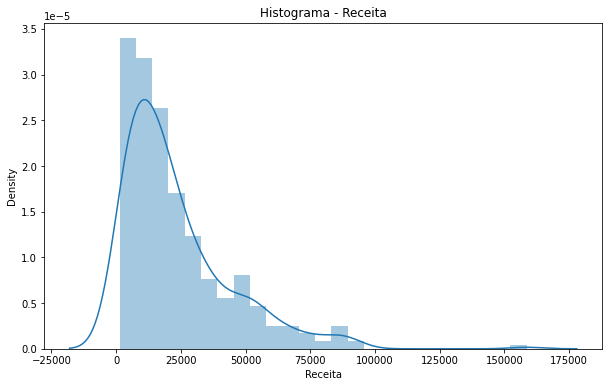

In [ ]:
plt.figure(figsize = (10, 6))
sns.distplot(dfb['Receita'])
plt.title("Histograma - Receita");

In [ ]:
df1 = dfb.sort_values('Data')

In [ ]:
df1.head()

,Data,Receita
0,2017-07-03,6726.564273
1,2017-07-04,2708.918182
2,2017-07-05,1349.764905
3,2017-07-06,2477.700967
4,2017-07-07,1620.309014


Text(0.5, 1.0, 'Receita ao longo do tempo')

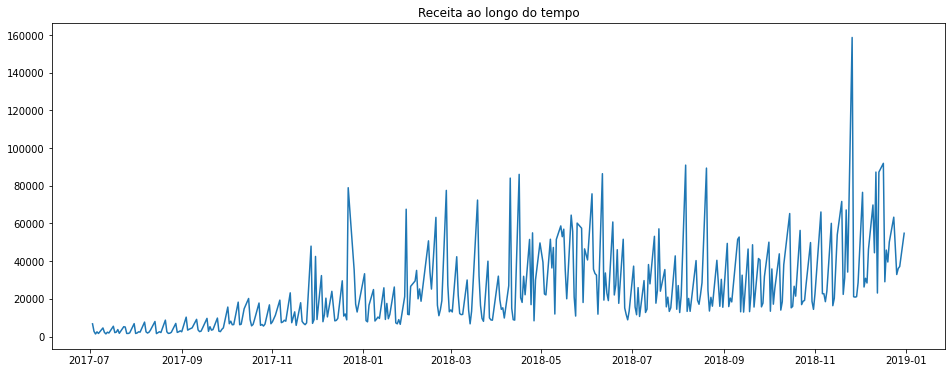

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(df1['Data'], df1['Receita'])
plt.title("Receita ao longo do tempo")

In [ ]:
# criando um data frame padrão
df2 = df1[['Data', 'Receita']]
# verificando as primeiras 5 linhas
df2.head()

,Data,Receita
0,2017-07-03,6726.564273
1,2017-07-04,2708.918182
2,2017-07-05,1349.764905
3,2017-07-06,2477.700967
4,2017-07-07,1620.309014


In [ ]:
df2 = df2.rename(columns={'Data': 'ds', 'Receita': 'y'})
df2.head()

,ds,y
0,2017-07-03,6726.564273
1,2017-07-04,2708.918182
2,2017-07-05,1349.764905
3,2017-07-06,2477.700967
4,2017-07-07,1620.309014


In [ ]:
# instanciando o modelo
modelo = Prophet()
# realizando o treinamento
modelo.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# método auxiliar para previsão
futuro = modelo.make_future_dataframe(periods = 365)
# previsão do modelo
previsao = modelo.predict(futuro)

In [ ]:
# verificando as primeiras 5 linhas
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-07-03,19883.498512,-97.492341,38930.328684
1,2017-07-04,-3231.534434,-21450.655031,14722.239312
2,2017-07-05,-4208.201170,-22650.529217,14157.947846
3,2017-07-06,-4303.081311,-22431.643799,13942.455083
4,2017-07-07,-2194.980035,-20421.293873,15116.439748


Text(0.5, 1.0, 'Receita Prevista')

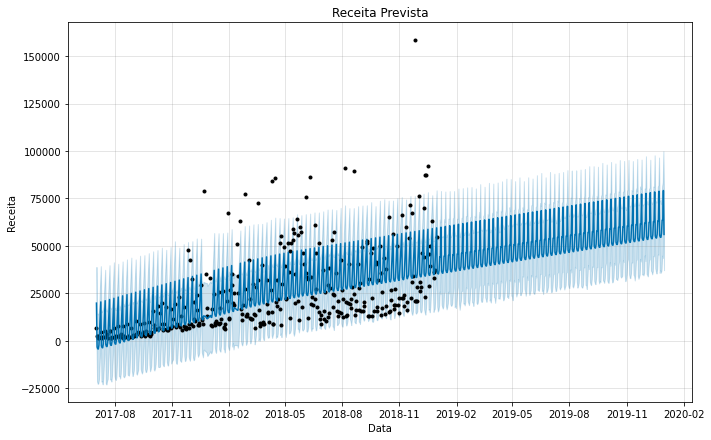

In [ ]:
# previsões do modelo treinado
figure = modelo.plot(previsao, xlabel = 'Data', ylabel = 'Receita')
plt.title("Receita Prevista")

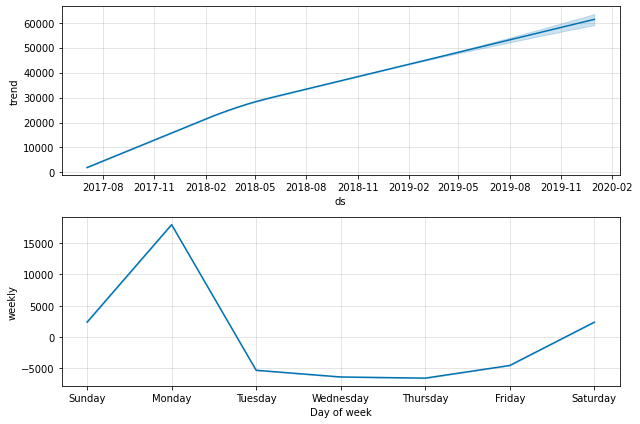

In [ ]:
# verificando os componentes
figura = modelo.plot_components(previsao)

In [ ]:
previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
734,2019-12-27,61121.029969,37229.280230,74781.689399,58832.795030,63208.958672,-4519.819644,-4519.819644,-4519.819644,-4519.819644,-4519.819644,-4519.819644,0.0,0.0,0.0,56601.210325
735,2019-12-28,61175.061056,44909.162447,81522.808830,58871.406514,63270.562226,2382.508089,2382.508089,2382.508089,2382.508089,2382.508089,2382.508089,0.0,0.0,0.0,63557.569145
736,2019-12-29,61229.092142,43732.214854,83792.019018,58910.017997,63332.165779,2382.508089,2382.508089,2382.508089,2382.508089,2382.508089,2382.508089,0.0,0.0,0.0,63611.600232
737,2019-12-30,61283.123229,59771.183636,99970.504344,58948.629481,63397.801736,17924.051025,17924.051025,17924.051025,17924.051025,17924.051025,17924.051025,0.0,0.0,0.0,79207.174254
738,2019-12-31,61337.154316,37231.036359,75612.956315,58987.240965,63463.468693,-5282.329951,-5282.329951,-5282.329951,-5282.329951,-5282.329951,-5282.329951,0.0,0.0,0.0,56054.824365


In [ ]:
from google.colab import files

previsao.to_excel('dfb.xlsx')
files.download('dfb.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>